# 1.Problem Statment

## Whow much calories burned depends on the duration of workout and also based on the gender, age，body temperature and heart rate at some stage in the exercise. 

# 2.The data set definition

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
Exercise=pd.read_csv(r"C:\Users\manda\Downloads\exercise.csv")


# .EDA

In [5]:
Exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
Calories= pd.read_csv(r"C:\Users\manda\Downloads\calories.csv")

In [7]:
Calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
df=pd.concat([Exercise,Calories['Calories']],axis=1)

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
df.shape

(15000, 9)

In [13]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:
df.drop(columns='User_ID',inplace=True)

In [15]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

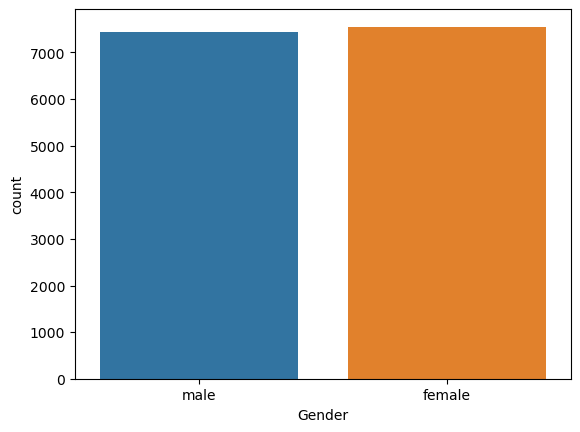

In [16]:
sns.countplot(df['Gender'])

#### From the above plot, we can observe that the data is evenly distributed(almost 7000) for both males and females.

<AxesSubplot:xlabel='Height', ylabel='Density'>

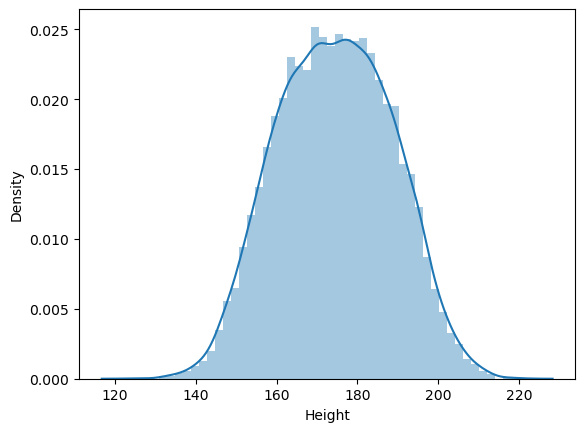

In [17]:
sns.distplot(df['Height'])

### Hence,from the above plot we can observe that the height data is normally distributed with mean of 174cm.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

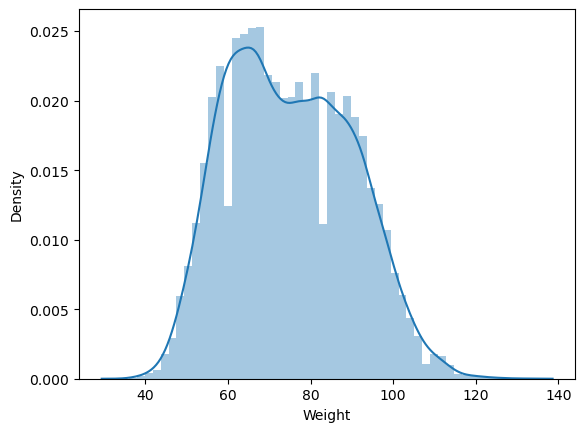

In [18]:
sns.distplot(df['Weight'])

### Hence,from the above plot we can observe that the weight data is also normally distributed with mean of 74 kg

<AxesSubplot:xlabel='Duration', ylabel='Density'>

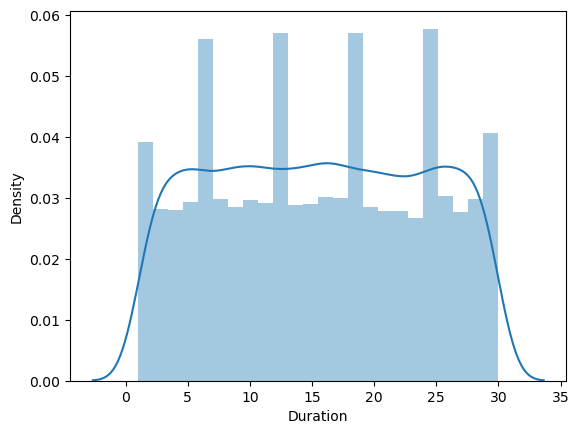

In [19]:
sns.distplot(df['Duration'])

### Hence, from the above plot we can observe that the duration data is a low peaked data with mean of 15mins

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

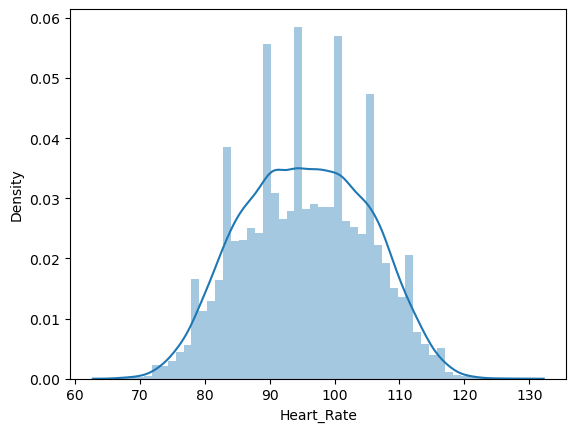

In [20]:
sns.distplot(df['Heart_Rate'])

### Hence,from the above plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

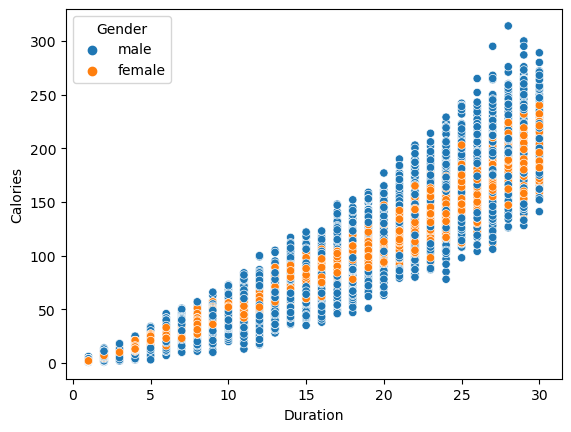

In [21]:
sns.scatterplot(data=df,x='Duration',y='Calories',hue='Gender')

### Hence,from the above plot we can observe that as Exersice duration increases calories burn aslo increases

<AxesSubplot:>

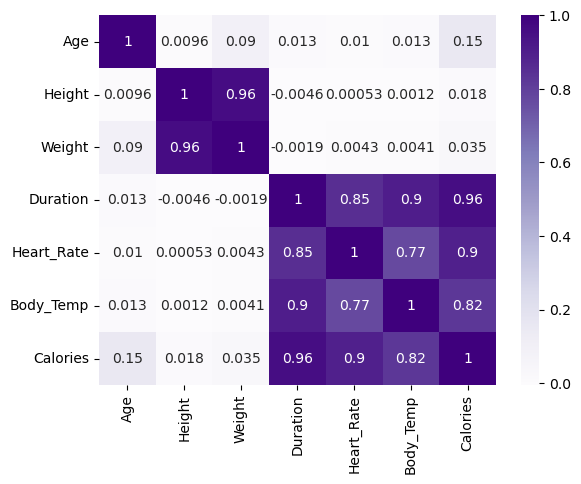

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='Purples')

### IT shows duration Between heart rate and body temperature are highly positively correlated with calories

# .Handeling Outliers¶

<AxesSubplot:>

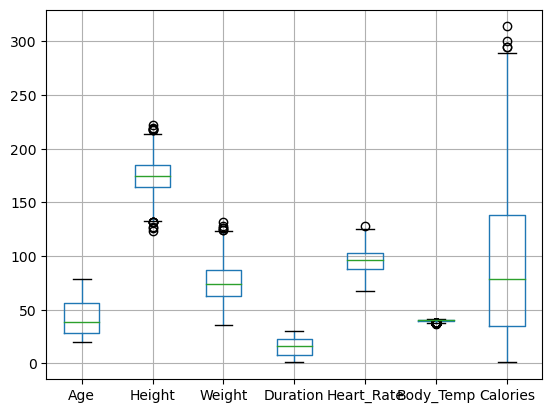

In [23]:
df.boxplot()

# .Splitting the Dataset for Training and Testing

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [26]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# .Convert Categorical Data into Numeric data

In [27]:
df1=pd.get_dummies(x,drop_first=True)

In [28]:
df1

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,0
14996,27,165.0,65.0,6.0,85.0,39.2,0
14997,43,159.0,58.0,16.0,90.0,40.1,0
14998,78,193.0,97.0,2.0,84.0,38.3,1


# .Using Scaling to Convert data into same unite

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()
x=ss.fit_transform(df1)
x=pd.DataFrame(x)

In [31]:
x.head()

,0,1,2,3,4,5,6
0,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,1.007092
1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.992958
2,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,1.007092
3,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.992958
4,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.992958


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=2023)

# .LinearRegrassion

In [34]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypread=lr.predict(xtest)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


r2_score=r2_score(ytest,ypread)
MAE=mean_absolute_error(ytest,ypread)
MSE=mean_squared_error(ytest,ypread)
RMSE=np.sqrt(MSE)

print(f'r2_score:{r2_score}\nmean_absolute_error:{MAE}\nmean_squared_error:{MSE}\nRMSE={RMSE}')

r2_score:0.9672537909612471
mean_absolute_error:8.322627452908856
mean_squared_error:123.0873951958855
RMSE=11.094475886488983


In [36]:
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"Training Accuracy{train} \nTesting Accuracy:{test}")

Training Accuracy0.9671614480849814 
Testing Accuracy:0.9672537909612471


# .KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn=KNeighborsRegressor(n_neighbors=5)

In [39]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [40]:
ypread=knn.predict(xtest)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
r2_score=r2_score(ytest,ypread)
MAE=mean_absolute_error(ytest,ypread)
MSE=mean_squared_error(ytest,ypread)
RMSE=np.sqrt(MSE)

In [43]:
print(f'r2_score:{r2_score}\nmean_absolute_error:{MAE}\nmean_squared_error:{MSE}\nRMSE={RMSE}')

r2_score:0.992697961992583
mean_absolute_error:3.851022222222222
mean_squared_error:27.447111111111113
RMSE=5.238999056223538


In [44]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

In [45]:
print(f"Training Accuracy{train} \nTesting Accuracy:{test}")

Training Accuracy0.9951759519741562 
Testing Accuracy:0.992697961992583


In [46]:
data={'Model':['Linear Regression','KNN'],'R2 Score':[0.96,0.99],'MAE':[8.32,3.85],'MSE':[123.0,27.44],'RMSE':[11.0,5.2]}

In [47]:
Regression_report=pd.DataFrame(data)

In [48]:
Regression_report

,Model,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.96,8.32,123.00,11.0
1,KNN,0.99,3.85,27.44,5.2
